# Análise Exploratória com Pandas
## Estudando as empresas Listadas na bolsa de Valores B3

In [2]:
import pandas as pd
import pprint
import seaborn as  sns
import matplotlib.pyplot as plt
import re
from unicodedata import normalize

pd.set_option('display.max_columns', None)

In [3]:
#Leirura do arquivo

data = pd.read_csv("../data/relatorio_acoes_2024_09_28.csv", sep=";")

In [4]:
# 7 primeiras linhas do dataset
data.head(7)

,PAPEL,COTACAO,P_L,P_VP,PSR,DIV_YIELD,P_ATIVO,P_CAP_GIRO,P_EBIT,P_ATIV_CIRC_LIQ,EV_EBIT,EV_EBITDA,MRG_EBIT,MRG_LIQ,LIQ_CORR,ROIC,ROE,LIQ_2MESES,PATRIM_LIQ,DIV_BRUT_PATRIM,CRESC_REC_5A
0,POPR4,10.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0866,0.0565,1.08,0.1525,0.1993,0.0,5.458030e+08,0.82,0.3093
1,PORP4,2.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.00,0.0000,-0.0208,0.0,2.239900e+07,0.00,0.1366
2,CFLU4,1000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0888,0.1072,1.10,0.1768,0.3215,0.0,6.035100e+07,0.06,0.0814
3,CSTB3,150.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4085,0.2898,2.60,0.2240,0.2011,0.0,8.420670e+09,0.14,0.3191
4,PMET3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.0410,0.0,-2.908630e+08,0.00,0.3774
5,CSTB4,147.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4085,0.2898,2.60,0.2240,0.2011,0.0,8.420670e+09,0.14,0.3191
6,CLAN3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.00,0.0000,-0.0105,0.0,1.012240e+09,0.00,-0.6396


In [5]:
# 5 últimas linhas do dataset

data.tail(5)

,PAPEL,COTACAO,P_L,P_VP,PSR,DIV_YIELD,P_ATIVO,P_CAP_GIRO,P_EBIT,P_ATIV_CIRC_LIQ,EV_EBIT,EV_EBITDA,MRG_EBIT,MRG_LIQ,LIQ_CORR,ROIC,ROE,LIQ_2MESES,PATRIM_LIQ,DIV_BRUT_PATRIM,CRESC_REC_5A
982,UBBR3,18.00,1466.61,4.77,0.000,0.0,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.0033,0.0,1.031720e+10,0.00,0.1058
983,CEPE3,128.00,1910.07,5.88,1.143,0.0,0.691,37.60,8.14,-1.10,14.83,10.86,0.1404,0.0006,1.08,0.0934,0.0031,0.0,1.624000e+09,5.20,0.0181
984,SEER3,6.06,2766.15,0.63,0.414,0.0,0.222,3.89,2.93,-0.58,5.22,2.86,0.1414,0.0001,1.27,0.0845,0.0002,2656550.0,1.240840e+09,0.75,0.1126
985,SHOW3,1.05,2831.35,0.43,0.145,0.0,0.158,2.59,2.96,-1.48,2.63,2.19,0.0489,-0.0004,1.13,0.0916,0.0002,328559.0,1.645830e+08,0.49,0.7920
986,LWSA3,4.30,3912.52,0.89,1.926,0.0,0.628,7.25,26.99,11.37,21.81,9.48,0.0714,0.0005,1.33,0.0272,0.0002,25520300.0,2.891700e+09,0.03,0.3446


In [6]:
# Estrutura do DataFrame

linhas = data.shape[0]
colunas = data.shape[1]
print(f"O DataFrame Possui {linhas} linhas e {colunas} colunas")

O DataFrame Possui 987 linhas e 21 colunas


In [7]:
# Explorando as colunas do DataFrame

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PAPEL            987 non-null    object 
 1   COTACAO          987 non-null    float64
 2   P_L              987 non-null    float64
 3   P_VP             987 non-null    float64
 4   PSR              987 non-null    float64
 5   DIV_YIELD        987 non-null    float64
 6   P_ATIVO          987 non-null    float64
 7   P_CAP_GIRO       987 non-null    float64
 8   P_EBIT           987 non-null    float64
 9   P_ATIV_CIRC_LIQ  987 non-null    float64
 10  EV_EBIT          987 non-null    float64
 11  EV_EBITDA        987 non-null    float64
 12  MRG_EBIT         987 non-null    float64
 13  MRG_LIQ          987 non-null    float64
 14  LIQ_CORR         987 non-null    float64
 15  ROIC             987 non-null    float64
 16  ROE              987 non-null    float64
 17  LIQ_2MESES      

### Estatísticas descritivas das principais Colunas

| Parâmetro | Significado |
|-------------|-------------|
| count | quantidade de valores|
| mean | média dos valores | 
| std | desvio padrão |
| min | valor mínimo do conjunto|
| 25% | 1º **quartil**|
| 50% |2º **quartil**|
| 75% |3ª **quartil**|
| max | valor máximo do conjunto |

NOTA: [QUARTIL](https://www.respondeai.com.br/conteudo/probabilidade-e-estatistica/estatistica/1-2-e-3-quartil-e-distancia-interquartil/862#:~:text=1%C2%BA%20quartil%2C%20%C3%A9%20o%20valor%20da%20posi%C3%A7%C3%A3o%20central,caminho%20entre%20a%20mediana%20e%20o%20%C3%BAltimo%20termo.)


#### Dividendos

In [11]:
data["DIV_YIELD"].describe()

count    987.000000
mean       0.033923
std        0.387885
min        0.000000
25%        0.000000
50%        0.000000
75%        0.022800
max       12.028900
Name: DIV_YIELD, dtype: float64

#### Preço/Lucro

In [13]:
data['P_L'].describe()

count     987.000000
mean       17.358126
std       243.301300
min     -3584.820000
25%        -0.260000
50%         4.610000
75%        12.975000
max      3912.520000
Name: P_L, dtype: float64

#### Preço de Mercado / Valor Patrimonial

In [15]:
data['P_VP'].describe()

count       987.000000
mean       1466.970476
std       31881.840053
min        -359.150000
25%           0.115000
50%           1.000000
75%           1.910000
max      723708.000000
Name: P_VP, dtype: float64

#### ROE

In [17]:
data['ROE'].describe()

count      987.000000
mean        27.734219
std        613.573638
min       -106.739000
25%          0.000000
50%          0.087000
75%          0.191750
max      13632.000000
Name: ROE, dtype: float64

#### CRESCIMENTO DE RECEITA 5 ANOS

In [19]:
data['CRESC_REC_5A'].describe()

count    987.000000
mean       0.221433
std        2.869840
min       -0.870300
25%        0.000750
50%        0.100100
75%        0.182200
max       63.540700
Name: CRESC_REC_5A, dtype: float64

#### LIQUIDEZ CORRENTE

In [21]:
data['LIQ_CORR'].describe()

count    987.000000
mean       1.910304
std        4.827732
min        0.000000
25%        0.450000
50%        1.260000
75%        2.100000
max       78.920000
Name: LIQ_CORR, dtype: float64

## ATIVIDADE 2

1. Analisar Dividend Yields das empresas
2. Calcular a média do *DIVIDEND YIELD* das empresas com *MARGEM LÍQUIDA* ACIMA DE 10%
3. Verificar percentual de empresas pagadoras de dividendos que tem P/L acima de 4.
4. Analisar quais empresas tem *LIQUIDEZ CORRENTE* acima de 1, TEM *ROE* acima da média das empreas e *DIVIDEND YIELD* maior ou igual a 6.
5. Criar Gráfico de Barra Horizontal com as 5 primeiras empresas, resultantes da análise anterior

### Análise dos dividendos das Empresas

#### Distribuição dos valores de DIVIDEND YIELD das empresas

/home/maercio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histograma dos dividendos das empresas')

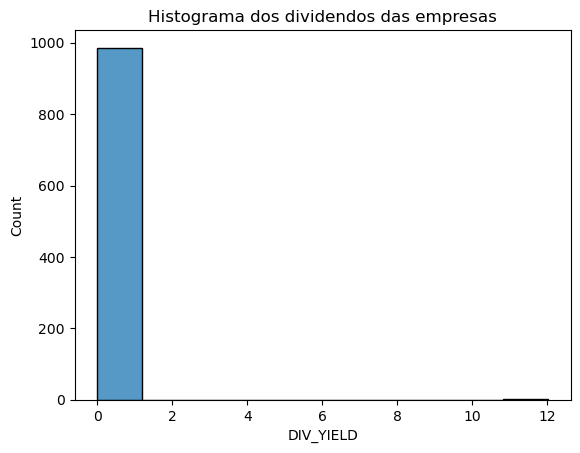

In [26]:
# Histograma com todos os dados da coluna DIV_YIELD

sns.histplot(data['DIV_YIELD'], bins=10)
plt.title('Histograma dos dividendos das empresas')

Text(0.5, 1.0, 'Distribuição dos valores de Dividend Yields das Empresas')

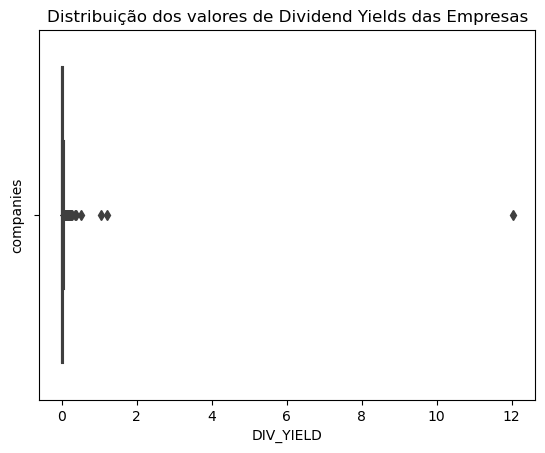

In [27]:
# Boxplot com todos os dados da coluna DIV_YIELD

sns.boxplot(x='DIV_YIELD', data=data.sort_values(by='DIV_YIELD'))
plt.ylabel('companies')
plt.title('Distribuição dos valores de Dividend Yields das Empresas')


#### Empresas com  DIVIDEND YIELD IGUAL A ZERO

In [29]:
companies_zero_div = data.query('DIV_YIELD == 0')
num_companies_zero_div = companies_zero_div.shape[0]
companies_total =data.shape[0]
print(companies_zero_div[['PAPEL', 'DIV_YIELD']])   
print('\033[31m' +"\U000026A0{:.2f}% das empresas da base de dados têm diviend yield igual à zero".format((num_companies_zero_div/companies_total)*100))

     PAPEL  DIV_YIELD
0    POPR4        0.0
1    PORP4        0.0
2    CFLU4        0.0
3    CSTB3        0.0
4    PMET3        0.0
..     ...        ...
982  UBBR3        0.0
983  CEPE3        0.0
984  SEER3        0.0
985  SHOW3        0.0
986  LWSA3        0.0

[674 rows x 2 columns]
⚠68.29% das empresas da base de dados têm diviend yield igual à zero


#### Empresas TOP 10 em relação do DIVIDEND YIELD

In [31]:
data[['PAPEL','DIV_YIELD']].sort_values(by='DIV_YIELD', ascending=False).head(10)

,PAPEL,DIV_YIELD
238,BRPR3,12.0289
115,CASH3,1.1966
422,TRPN3,1.0474
119,EPAR3,0.5031
451,SYNE3,0.3744
323,BPAT33,0.3572
495,ALLD3,0.2650
548,LEVE3,0.2540
832,PATI4,0.2456
597,EKTR3,0.2168


#### Empresas com dividend yield menor que 1 e maior que zero

In [33]:
dividend_clean = data.query('DIV_YIELD < 1 and DIV_YIELD > 0')
dividend_clean['DIV_YIELD'].describe()

count    310.000000
mean       0.061966
std        0.058855
min        0.000400
25%        0.026725
50%        0.047300
75%        0.078275
max        0.503100
Name: DIV_YIELD, dtype: float64

Text(0.5, 1.0, 'Distribuição dos valores de Dividend Yields das Empresas')

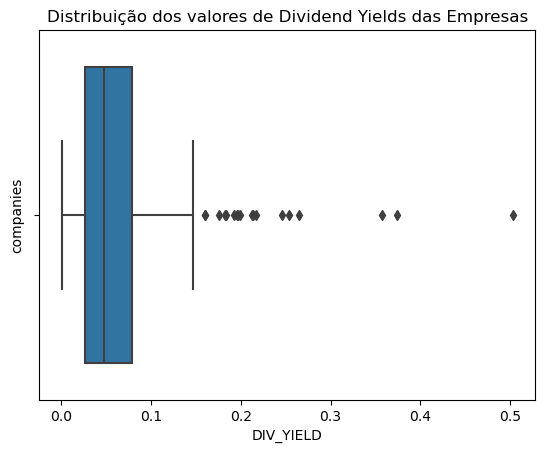

In [34]:
sns.boxplot(x='DIV_YIELD', data=dividend_clean)
plt.ylabel('companies')
plt.title('Distribuição dos valores de Dividend Yields das Empresas')

#### DIVIDEND YIELD das empresas com MARGEM LÍQUIDA MAIOR QUE 10%

In [36]:
dividend_top = dividend_clean.query("MRG_LIQ > 0.1")
dividend_top['DIV_YIELD'].describe()

count    155.000000
mean       0.069250
std        0.053471
min        0.001700
25%        0.034350
50%        0.054100
75%        0.090600
max        0.374400
Name: DIV_YIELD, dtype: float64

/home/maercio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'dividend yield')

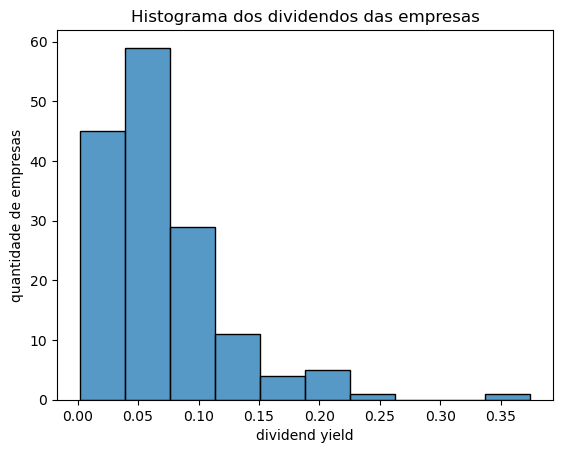

In [37]:
sns.histplot(dividend_top['DIV_YIELD'], bins=10)
plt.title('Histograma dos dividendos das empresas')
plt.ylabel('quantidade de empresas')
plt.xlabel('dividend yield')

In [38]:
dividend_top['MRG_LIQ'].describe()

count    155.000000
mean       0.594205
std        2.172754
min        0.101300
25%        0.124800
50%        0.178500
75%        0.262200
max       13.812900
Name: MRG_LIQ, dtype: float64

/home/maercio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'MARGEM LÍQUIDA')

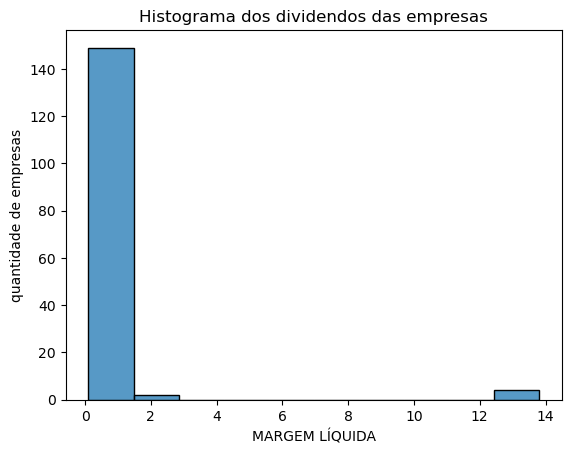

In [39]:
sns.histplot(dividend_top['MRG_LIQ'], bins=10)
plt.title('Histograma dos dividendos das empresas')
plt.ylabel('quantidade de empresas')
plt.xlabel('MARGEM LÍQUIDA')

<Axes: xlabel='MRG_LIQ'>

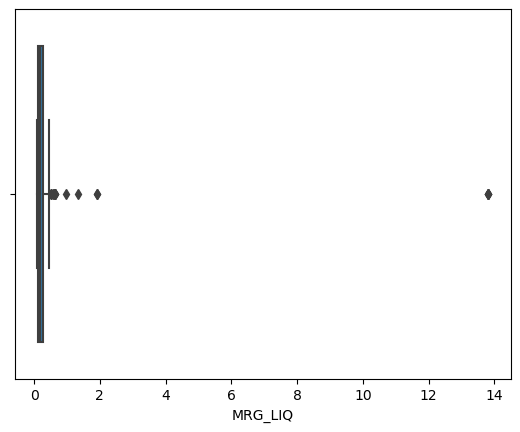

In [40]:
sns.boxplot(x=dividend_top['MRG_LIQ'])

In [41]:
dividend_top[['PAPEL', 'DIV_YIELD', 'MRG_LIQ']].sort_values(by='MRG_LIQ', ascending=False)

,PAPEL,DIV_YIELD,MRG_LIQ
899,BRGE11,0.0214,13.8129
897,BRGE8,0.0178,13.8129
895,BRGE7,0.0251,13.8129
893,BRGE6,0.0436,13.8129
603,ITSA3,0.0660,1.9175
...,...,...,...
631,ENGI11,0.0417,0.1035
743,ENGI3,0.0274,0.1035
588,NTCO3,0.0529,0.1022
793,FRAS3,0.0300,0.1016


#### Percentual das empresas pagadoras de dividendos que possuem P/L maior que 4

In [43]:
df_PL_company = dividend_clean.query("P_L > 4")
percentual_company = (df_PL_company.shape[0]/data.shape[0])*100
print( '\033[31m' + "\U000026A0 {:.2f}% das empresas pagadores de dividendos tem P/L maior que 4".format(percentual_company, 2))

df_PL_company['P_L'].describe()

⚠ 28.17% das empresas pagadores de dividendos tem P/L maior que 4


count    278.000000
mean      16.971942
std       30.803717
min        4.050000
25%        7.040000
50%       10.130000
75%       16.925000
max      363.710000
Name: P_L, dtype: float64

In [44]:
df_PL_company[['PAPEL', 'DIV_YIELD', 'MRG_LIQ', 'P_L']].sort_values(by='P_L', ascending=False)

,PAPEL,DIV_YIELD,MRG_LIQ,P_L
974,CALI3,0.0238,0.0041,363.71
969,SUZB3,0.0224,0.0060,306.64
961,VSTE3,0.0038,0.0105,123.37
952,CASN3,0.0010,0.0657,103.19
948,MSPA3,0.0069,0.0193,89.73
...,...,...,...,...
485,VBBR3,0.0732,0.0369,4.26
484,PINE4,0.0776,0.0000,4.26
483,BGIP3,0.0785,0.0000,4.24
480,CSRN3,0.1992,0.1530,4.12


/home/maercio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Preço/Lucro')

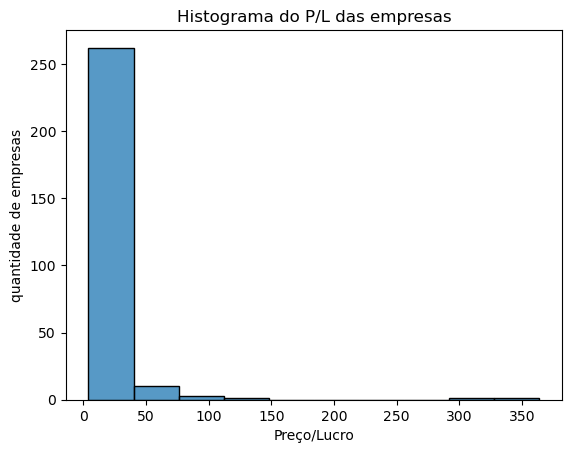

In [45]:
sns.histplot(df_PL_company['P_L'], bins=10)
plt.title('Histograma do P/L das empresas')
plt.ylabel('quantidade de empresas')
plt.xlabel('Preço/Lucro')

#### Média do ROE das empresas pagadoras de dividendos

In [47]:
dividend_average = dividend_clean['ROE']
print(  "\U000026A0 A média do ROE das empresas pagadoras de dividendos é: {:.2f}".format(dividend_average.mean()))
dividend_average.describe()

⚠ A média do ROE das empresas pagadoras de dividendos é: 0.15


count    310.000000
mean       0.151228
std        0.195617
min       -0.241400
25%        0.069700
50%        0.127350
75%        0.196550
max        1.986600
Name: ROE, dtype: float64

In [48]:
dividend_clean['DIV_YIELD'].mean()

0.061965806451612884

#### Empresas pagadoras de dividendo com *LIQUIDEZ CORRENTE* acima de 1, e *ROE* acima da média.

In [50]:
dividend_avg = dividend_clean['DIV_YIELD'].mean()
roe_avg = dividend_clean['ROE'].mean()
company_top = dividend_clean.query(F"DIV_YIELD >= {dividend_avg} & ROE >= {roe_avg}")
company_top

,PAPEL,COTACAO,P_L,P_VP,PSR,DIV_YIELD,P_ATIVO,P_CAP_GIRO,P_EBIT,P_ATIV_CIRC_LIQ,EV_EBIT,EV_EBITDA,MRG_EBIT,MRG_LIQ,LIQ_CORR,ROIC,ROE,LIQ_2MESES,PATRIM_LIQ,DIV_BRUT_PATRIM,CRESC_REC_5A
438,HBTS5,35.50,1.72,0.48,1.020,0.0856,0.205,2.95,1.94,-0.47,3.21,3.19,0.5260,0.5923,2.10,0.1084,0.2779,5701.87,6.773130e+08,0.36,0.5439
451,SYNE3,7.70,2.49,0.59,0.830,0.3744,0.259,0.77,2.18,4.86,1.49,1.29,0.3802,0.4231,5.74,0.1714,0.2357,6715560.00,2.005940e+09,0.50,0.2291
459,POSI3,5.88,2.91,0.50,0.195,0.0711,0.188,0.56,2.25,2.65,4.17,3.61,0.0865,0.0679,1.95,0.1160,0.1721,11893900.00,1.665330e+09,0.74,0.2227
475,BAZA3,92.10,3.92,0.80,0.000,0.0717,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.2040,273420.00,6.461360e+09,0.00,0.1884
476,BGIP4,25.00,3.95,0.65,0.000,0.0925,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1643,50158.10,7.147290e+08,0.00,0.0276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,CURY3,22.70,11.38,7.25,1.949,0.0735,1.663,4.34,8.58,-175.84,7.96,7.69,0.2271,0.1785,2.12,0.3379,0.6372,45709900.00,9.134530e+08,1.18,0.3188
711,DIRR3,30.65,11.44,2.36,1.965,0.0825,0.604,1.69,10.17,-2.56,10.18,9.06,0.1932,0.1991,3.76,0.0723,0.2064,55571200.00,2.252490e+09,0.63,0.1731
725,ODPV3,11.29,11.87,5.05,2.853,0.1048,2.626,-29.78,10.90,-18.76,9.67,8.88,0.2618,0.2404,0.79,0.3482,0.4257,10848800.00,1.234900e+09,0.00,0.0546
729,FIBR3,66.30,12.03,2.59,2.010,0.0759,0.899,9.59,5.13,-2.54,7.17,5.29,0.3918,0.1675,1.46,0.2295,0.2157,0.00,1.414900e+10,1.46,0.2271


##### Estatísticas descritivas das empresas pagadores de dividendos 

In [52]:
company_top['DIV_YIELD'].describe()

count    63.000000
mean      0.111679
std       0.055572
min       0.063900
25%       0.075250
50%       0.092200
75%       0.120400
max       0.374400
Name: DIV_YIELD, dtype: float64

Text(0.5, 1.0, 'Distribuição dos valores de Dividend Yields das Empresas')

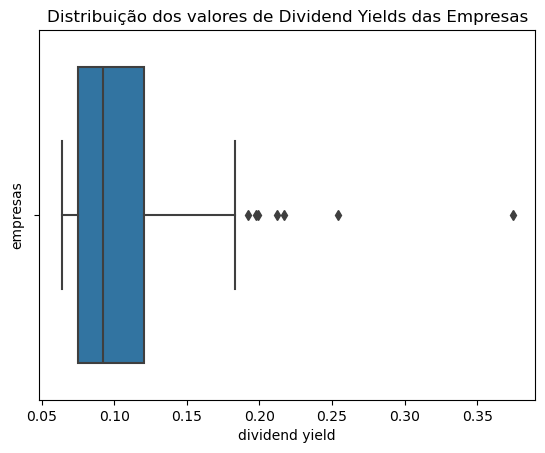

In [53]:
sns.boxplot(x=company_top['DIV_YIELD'])
plt.ylabel('empresas')
plt.xlabel('dividend yield')
plt.title('Distribuição dos valores de Dividend Yields das Empresas')

In [54]:
company_top['ROE'].describe()

count    63.000000
mean      0.336059
std       0.331623
min       0.157200
25%       0.194150
50%       0.223500
75%       0.343050
max       1.986600
Name: ROE, dtype: float64

Text(0.5, 1.0, 'Distribuição dos valores do ROE das Empresas')

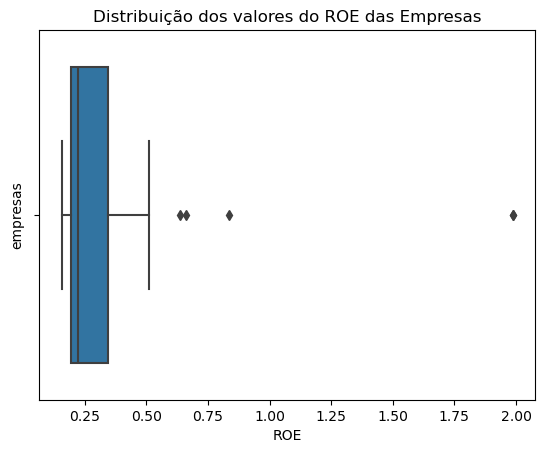

In [55]:
sns.boxplot(x=company_top['ROE'])
plt.ylabel('empresas')
plt.xlabel('ROE')
plt.title('Distribuição dos valores do ROE das Empresas')

<Axes: >

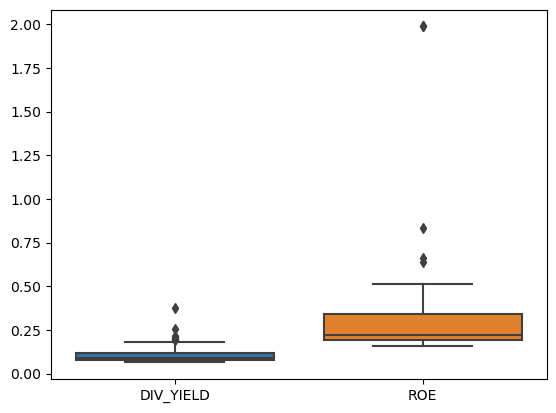

In [56]:
sns.boxplot(data=company_top[['DIV_YIELD','ROE']])

In [57]:
# Analisando valores do ROEs das empresas

company_top[['PAPEL','ROE', 'DIV_YIELD', 'LIQ_CORR']].sort_values(by='DIV_YIELD', ascending=False)

,PAPEL,ROE,DIV_YIELD,LIQ_CORR
451,SYNE3,0.2357,0.3744,5.74
548,LEVE3,0.6625,0.2540,2.01
597,EKTR3,0.4392,0.2168,1.06
637,EKTR4,0.4392,0.2121,1.06
480,CSRN3,0.3356,0.1992,1.81
...,...,...,...,...
654,POMO4,0.2659,0.0687,1.88
515,SOJA3,0.2250,0.0683,1.98
603,ITSA3,0.1713,0.0660,2.25
604,ITSA4,0.1713,0.0660,2.25


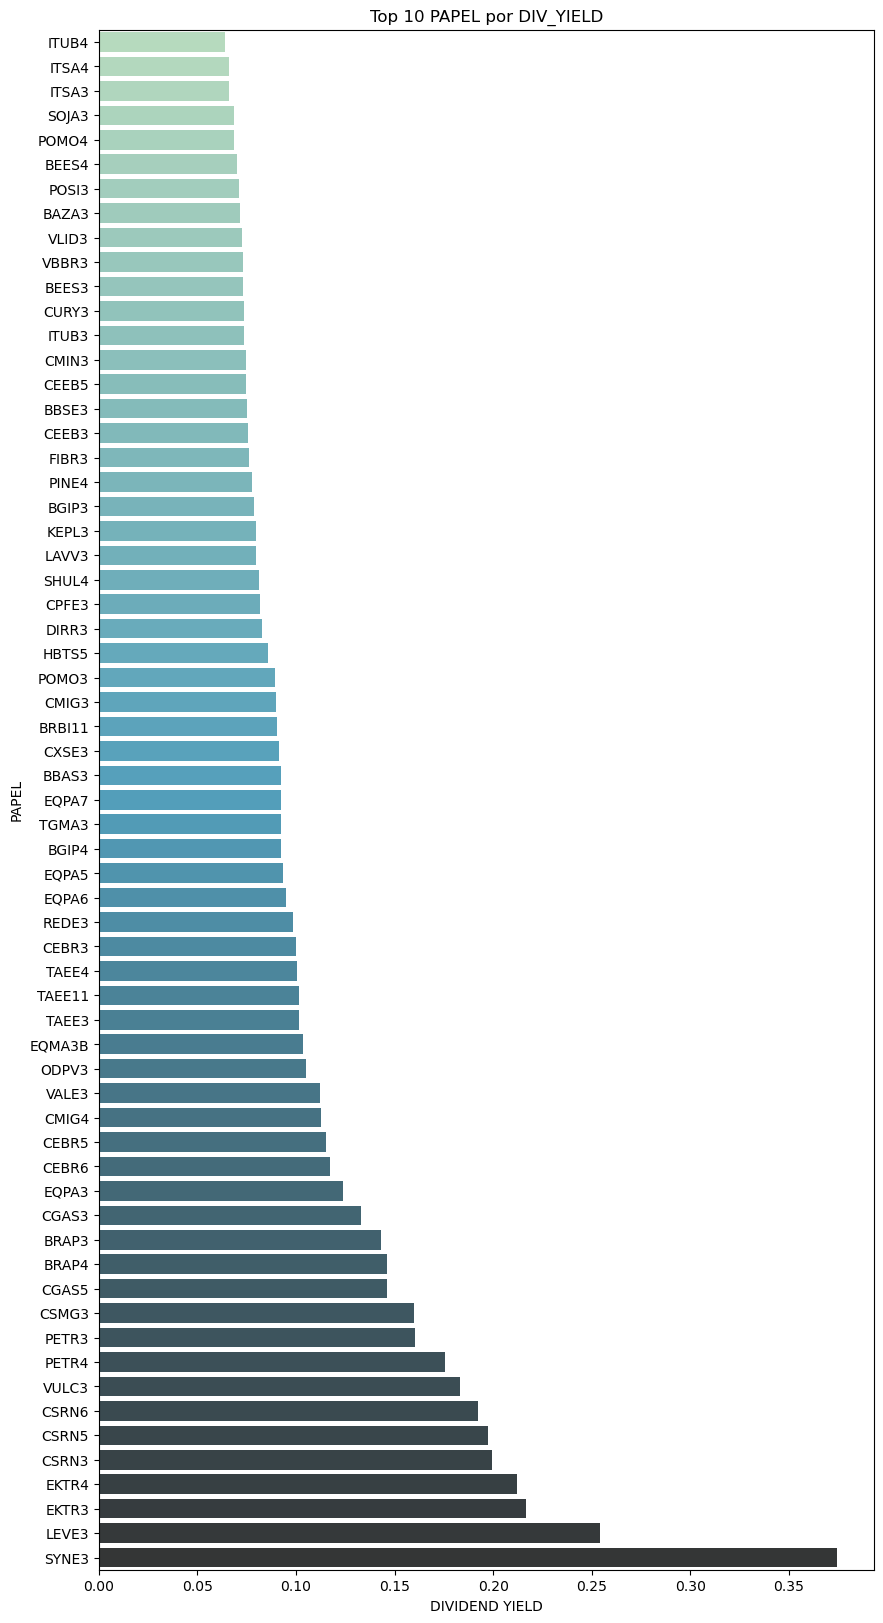

In [58]:
# Ordenando o DataFrame com base em 'DIV_YIELD' em ordem decrescente
data_sorted = company_top[['PAPEL','ROE', 'DIV_YIELD']].sort_values(by='DIV_YIELD',ascending=True)

# Selecionando as primeiras 10 linhas
data_top10 = data_sorted

# Criando o gráfico de barras para os 10 maiores valores de 'DIV_YIELD'
plt.figure(figsize=(10,20))
sns.barplot(x='DIV_YIELD', y='PAPEL', data=data_top10, palette="GnBu_d")
plt.title('Top 10 PAPEL por DIV_YIELD')
plt.xlabel('DIVIDEND YIELD')
plt.ylabel('PAPEL')
plt.show()
